# 대표 색상 추출 및 이미지 색상 유사도 분석

In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1. Google Drive 마운트

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 2. 이미지 불러오기 및 리사이즈

이미지 1:


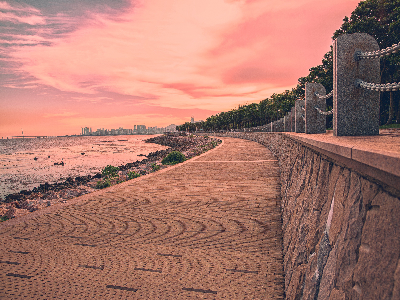

이미지 2:


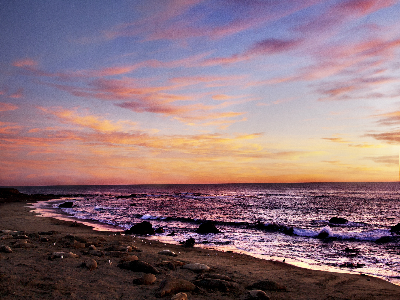

In [3]:
img1 = cv2.imread('/content/gdrive/My Drive/Project/Images/sunset.jpg')
img2 = cv2.imread('/content/gdrive/My Drive/Project/Images/sunset2.jpg')

fixed_w, fixed_h = 400, 300

img1_resized = cv2.resize(img1, (fixed_w, fixed_h))
img2_resized = cv2.resize(img2, (fixed_w, fixed_h))

print("이미지 1:")
cv2_imshow(img1_resized)

print("이미지 2:")
cv2_imshow(img2_resized)

## 3. 대표 색상(K-Means) 추출 함수

In [4]:
def extract_colors(image, K = 5):
    Z = image.reshape((-1, 3))
    Z = np.float32(Z)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_PP_CENTERS)

    center = np.uint8(center)
    counts = np.bincount(label.flatten())

    return center, counts

## 4. 두 이미지에서 대표 색상 5개 추출

In [5]:
K = 5
center1, counts1 = extract_colors(img1_resized, K)
center2, counts2 = extract_colors(img2_resized, K)

ratio1 = counts1 / counts1.sum()
ratio2 = counts2 / counts2.sum()

## 5. 대표 색상 및 비율 출력

In [6]:
print("=== 이미지 1 대표색 & 비율 ===")
for i in range(K):
    print(f"Color {i+1} {center1[i]} : {ratio1[i] * 100:.2f}%")

print("\n=== 이미지 2 대표색 & 비율 ===")
for i in range(K):
    print(f"Color {i+1} {center2[i]} : {ratio2[i] * 100:.2f}%")

=== 이미지 1 대표색 & 비율 ===
Color 1 [156 171 249] : 33.24%
Color 2 [ 90 104 150] : 21.70%
Color 3 [ 70  74 100] : 17.49%
Color 4 [120 135 189] : 16.30%
Color 5 [50 45 48] : 11.26%

=== 이미지 2 대표색 & 비율 ===
Color 1 [29 27 45] : 24.53%
Color 2 [188 187 211] : 23.97%
Color 3 [159 123 142] : 22.21%
Color 4 [110  81 106] : 14.12%
Color 5 [125 153 214] : 15.17%


## 6. 두 이미지의 평균 대표색 기반 색상 유사도 계산

In [7]:
avg1 = np.mean(center1, axis = 0)
avg2 = np.mean(center2, axis = 0)

color_distance = np.linalg.norm(avg1 - avg2)

print("=== 두 이미지 색상 유사도 ===")
print(f"평균 대표색 간 거리: {color_distance:.2f}")

if color_distance < 30:
    print("→ 매우 비슷한 색감")
elif color_distance < 60:
    print("→ 적당히 비슷한 색감")
else:
    print("→ 매우 다른 색감")

=== 두 이미지 색상 유사도 ===
평균 대표색 간 거리: 26.62
→ 매우 비슷한 색감


## 7. 예시 (1)

이미지 3:


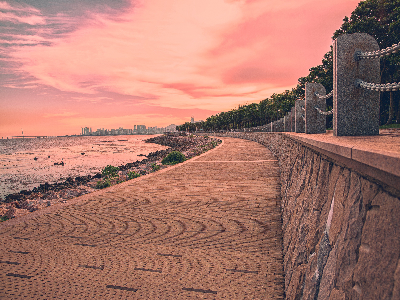

이미지 4:


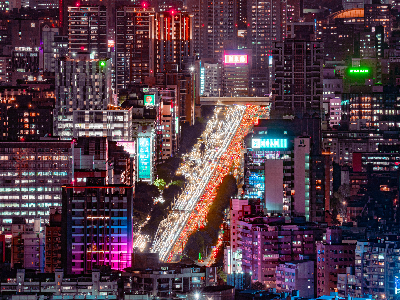

In [8]:
img3 = cv2.imread('/content/gdrive/My Drive/Project/Images/sunset.jpg')
img4 = cv2.imread('/content/gdrive/My Drive/Project/Images/skyscraper.jpg')

fixed_w, fixed_h = 400, 300

img3_resized = cv2.resize(img3, (fixed_w, fixed_h))
img4_resized = cv2.resize(img4, (fixed_w, fixed_h))

print("이미지 3:")
cv2_imshow(img3_resized)

print("이미지 4:")
cv2_imshow(img4_resized)

In [9]:
def extract_colors(image, K = 5):
    Z = image.reshape((-1, 3))
    Z = np.float32(Z)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_PP_CENTERS)

    center = np.uint8(center)
    counts = np.bincount(label.flatten())

    return center, counts

In [10]:
K = 5
center3, counts3 = extract_colors(img3_resized, K)
center4, counts4 = extract_colors(img4_resized, K)

ratio3 = counts3 / counts3.sum()
ratio4 = counts4 / counts4.sum()

In [11]:
print("=== 이미지 3 대표색 & 비율 ===")
for i in range(K):
    print(f"Color {i+1} {center1[i]} : {ratio1[i] * 100:.2f}%")

print("\n=== 이미지 4 대표색 & 비율 ===")
for i in range(K):
    print(f"Color {i+1} {center2[i]} : {ratio2[i] * 100:.2f}%")

=== 이미지 3 대표색 & 비율 ===
Color 1 [156 171 249] : 33.24%
Color 2 [ 90 104 150] : 21.70%
Color 3 [ 70  74 100] : 17.49%
Color 4 [120 135 189] : 16.30%
Color 5 [50 45 48] : 11.26%

=== 이미지 4 대표색 & 비율 ===
Color 1 [29 27 45] : 24.53%
Color 2 [188 187 211] : 23.97%
Color 3 [159 123 142] : 22.21%
Color 4 [110  81 106] : 14.12%
Color 5 [125 153 214] : 15.17%


In [12]:
avg3 = np.mean(center3, axis = 0)
avg4 = np.mean(center4, axis = 0)

color_distance = np.linalg.norm(avg3 - avg4)

print("=== 두 이미지 색상 유사도 ===")
print(f"평균 대표색 간 거리: {color_distance:.2f}")

if color_distance < 30:
    print("→ 매우 비슷한 색감")
elif color_distance < 60:
    print("→ 적당히 비슷한 색감")
else:
    print("→ 매우 다른 색감")

=== 두 이미지 색상 유사도 ===
평균 대표색 간 거리: 32.29
→ 적당히 비슷한 색감


## 8. 예시 (2)

이미지 5:


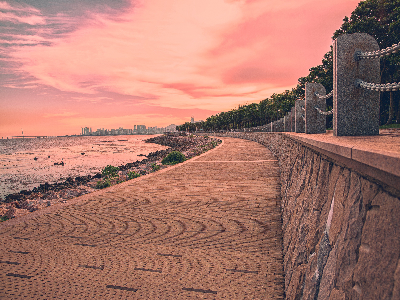

이미지 6:


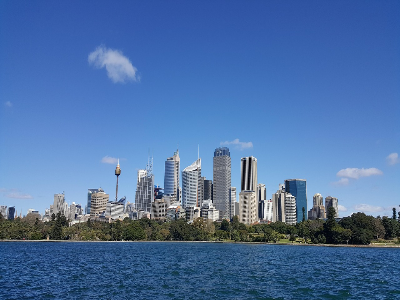

In [13]:
img5 = cv2.imread('/content/gdrive/My Drive/Project/Images/sunset.jpg')
img6 = cv2.imread('/content/gdrive/My Drive/Project/Images/skyscraper2.jpg')

fixed_w, fixed_h = 400, 300

img5_resized = cv2.resize(img5, (fixed_w, fixed_h))
img6_resized = cv2.resize(img6, (fixed_w, fixed_h))

print("이미지 5:")
cv2_imshow(img5_resized)

print("이미지 6:")
cv2_imshow(img6_resized)

In [14]:
def extract_colors(image, K = 5):
    Z = image.reshape((-1, 3))
    Z = np.float32(Z)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_PP_CENTERS)

    center = np.uint8(center)
    counts = np.bincount(label.flatten())

    return center, counts

In [15]:
K = 5
center5, counts5 = extract_colors(img5_resized, K)
center6, counts6 = extract_colors(img6_resized, K)

ratio5 = counts5 / counts5.sum()
ratio6 = counts6 / counts6.sum()

In [16]:
print("=== 이미지 5 대표색 & 비율 ===")
for i in range(K):
    print(f"Color {i+1} {center1[i]} : {ratio1[i] * 100:.2f}%")

print("\n=== 이미지 6 대표색 & 비율 ===")
for i in range(K):
    print(f"Color {i+1} {center2[i]} : {ratio2[i] * 100:.2f}%")

=== 이미지 5 대표색 & 비율 ===
Color 1 [156 171 249] : 33.24%
Color 2 [ 90 104 150] : 21.70%
Color 3 [ 70  74 100] : 17.49%
Color 4 [120 135 189] : 16.30%
Color 5 [50 45 48] : 11.26%

=== 이미지 6 대표색 & 비율 ===
Color 1 [29 27 45] : 24.53%
Color 2 [188 187 211] : 23.97%
Color 3 [159 123 142] : 22.21%
Color 4 [110  81 106] : 14.12%
Color 5 [125 153 214] : 15.17%


In [17]:
avg5 = np.mean(center5, axis = 0)
avg6 = np.mean(center6, axis = 0)

color_distance = np.linalg.norm(avg5 - avg6)

print("=== 두 이미지 색상 유사도 ===")
print(f"평균 대표색 간 거리: {color_distance:.2f}")

if color_distance < 30:
    print("→ 매우 비슷한 색감")
elif color_distance < 60:
    print("→ 적당히 비슷한 색감")
else:
    print("→ 매우 다른 색감")

=== 두 이미지 색상 유사도 ===
평균 대표색 간 거리: 86.54
→ 매우 다른 색감
